# BC Data Scientist Interview
#### Developed by: Farshid Shoushtarian

### Development tools documentation
This notebook was developed using the following tools:

1. Python: Version 3.11.9
2. Jupyter Notebook: It was used for interactive data analysis and visualization.
3. Python libraries used:<br>
    3.1. Numpy: For numerical operations<br>
    3.2. Pandas: For data manipulation and analysis<br>
    3.2. Matplotlib: For data visualization<br>
    3.3. Seaborn: For enhanced visualization<br>
    3.4. Folium: For geospatial visualization<br>
    3.5. Chardet: For detecting the encoding of our data<br>
    3.5. Logging: For debugging issues in data reading<br>
    

For reproducibility, the exact versions of the libraries can be found in the "requirements.txt" file.

In [87]:
# imporing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import folium
import chardet
import logging

In [53]:
# reading  the complete dataset

## let's Define a function to process files
def process_csv(file_path):
    try:
        # detecting encoding
        with open(file_path, 'rb') as file:
            result = chardet.detect(file.read())
        
        # reading and processing the data we have
        df = pd.read_csv(file_path, delimiter=',', encoding=result['encoding'])
        df['Time'] = pd.to_datetime(df['datetime_utc'])
        df.drop(columns=['datetime_utc'], inplace= True)
        df.set_index('Time', inplace=True)

        
        return df
    except Exception as e:
        logging.error(f"Error processing {file_path}: {str(e)}")
        return None


In [54]:
# creating our df with our data
df = process_csv("dev.csv")

In [55]:
# a quick look at the head of our data
df.head()

,wtempc,atempc,winddir_dcfn,precp_in,relh_pct,spc,dox_mgl,ph,windgust_knots,wse1988,wvel_fps,mbars,windspeed_knots,par,turb_fnu
Time,,,,,,,,,,,,,,,
2023-01-02 00:00:00,1.2,4.3,64.0,0.0,79.8,250.0,14.8,8.0,0.313,-0.30,1.81,1014.0,0.01,0.7,15.3
2023-01-02 00:15:00,1.2,3.8,24.0,0.0,82.2,251.0,14.9,8.0,0.509,-0.43,1.86,1015.0,0.05,0.7,14.4
2023-01-02 00:30:00,1.2,3.6,191.0,0.0,83.9,252.0,14.8,8.0,0.451,-0.52,1.80,1016.0,0.12,0.7,14.9
2023-01-02 00:45:00,1.2,3.3,125.0,0.0,84.9,253.0,14.8,8.0,0.372,-0.60,1.65,1015.0,0.02,0.7,14.3
2023-01-02 01:00:00,1.2,3.4,200.0,0.0,85.5,253.0,14.8,8.0,1.250,-0.67,1.82,1016.0,0.60,0.7,14.6


In [56]:
# a quick look at the tail of our data
df.tail()

,wtempc,atempc,winddir_dcfn,precp_in,relh_pct,spc,dox_mgl,ph,windgust_knots,wse1988,wvel_fps,mbars,windspeed_knots,par,turb_fnu
Time,,,,,,,,,,,,,,,
2024-02-19 22:45:00,1.4,-1.8,24.0,0.0,35.3,245.0,15.0,8.0,4.45,-0.93,1.01,1025.0,1.50,2.7,3.1
2024-02-19 23:00:00,1.4,-2.0,49.0,0.0,36.6,245.0,15.0,8.0,3.43,-1.10,1.03,1025.0,1.16,0.1,3.0
2024-02-19 23:15:00,1.4,-2.2,34.0,0.0,37.0,244.0,15.0,8.0,3.80,-1.27,1.02,1025.0,1.39,0.0,3.1
2024-02-19 23:30:00,1.4,-2.4,56.0,0.0,37.4,245.0,15.0,8.0,2.92,-1.44,1.04,1026.0,1.09,0.0,2.9
2024-02-19 23:45:00,1.3,-2.6,55.0,0.0,38.2,245.0,15.0,8.0,4.21,-1.61,0.99,1026.0,1.21,0.0,3.2


Quick notes

- Almost a year of data from 2023-01-02 to 2024-02-19 
- 15-min intervals
- physical, chemical, and mtrological parameters

In [57]:
# collumn names

## let's change the name of the collumns to better understand our df

### defining a dictionary that maps old column names to more descriptive names
new_column_names = {
    'wtempc': 'water_temperature_C',
    'atempc': 'air_temperature_C',
    'winddir_dcfn': 'wind_direction_deg',
    'precp_in': 'precipitation_inch',
    'relh_pct': 'relative_humidity_%',
    'spc': 'specific_conductivity_us/cm',
    'dox_mgl': 'dissolved_oxygen_ppm',
    'ph': 'pH',
    'windgust_knots': 'wind_gust_knots',
    'wse1988': 'water_surface_elevation_m',
    'wvel_fps': 'water_velocity_fps',
    'mbars': 'atmospheric_pressure_mbars',
    'windspeed_knots': 'wind_speed_knots',
    'par': 'photosynthetically_active_radiation_par',
    'turb_fnu': 'turbidity_fnu'
}

### applying renaming on our data
df.rename(columns=new_column_names, inplace=True)

### let's verify the new column names
print(df.columns)


Index(['water_temperature_C', 'air_temperature_C', 'wind_direction_deg',
       'precipitation_inch', 'relative_humidity_%',
       'specific_conductivity_us/cm', 'dissolved_oxygen_ppm', 'pH',
       'wind_gust_knots', 'water_surface_elevation_m', 'water_velocity_fps',
       'atmospheric_pressure_mbars', 'wind_speed_knots',
       'photosynthetically_active_radiation_par', 'turbidity_fnu'],
      dtype='object')


In [58]:
# let's look at a summary of statistics for each feature
stats_table = df.describe()
print(stats_table)


       water_temperature_C  air_temperature_C  wind_direction_deg  \
count         39408.000000       39548.000000        39548.000000   
mean             11.273574          10.180927          160.069030   
std               8.958956           9.622149          106.167885   
min               0.000000         -23.500000            0.000000   
25%               2.700000           2.200000           48.000000   
50%               9.600000           9.000000          183.000000   
75%              21.000000          18.800000          199.000000   
max              26.500000          33.300000          360.000000   

       precipitation_inch  relative_humidity_%  specific_conductivity_us/cm  \
count        39548.000000         39551.000000                 39401.000000   
mean             0.000727            72.246110                   238.469760   
std              0.005529            19.596247                    40.555304   
min              0.000000            13.100000                

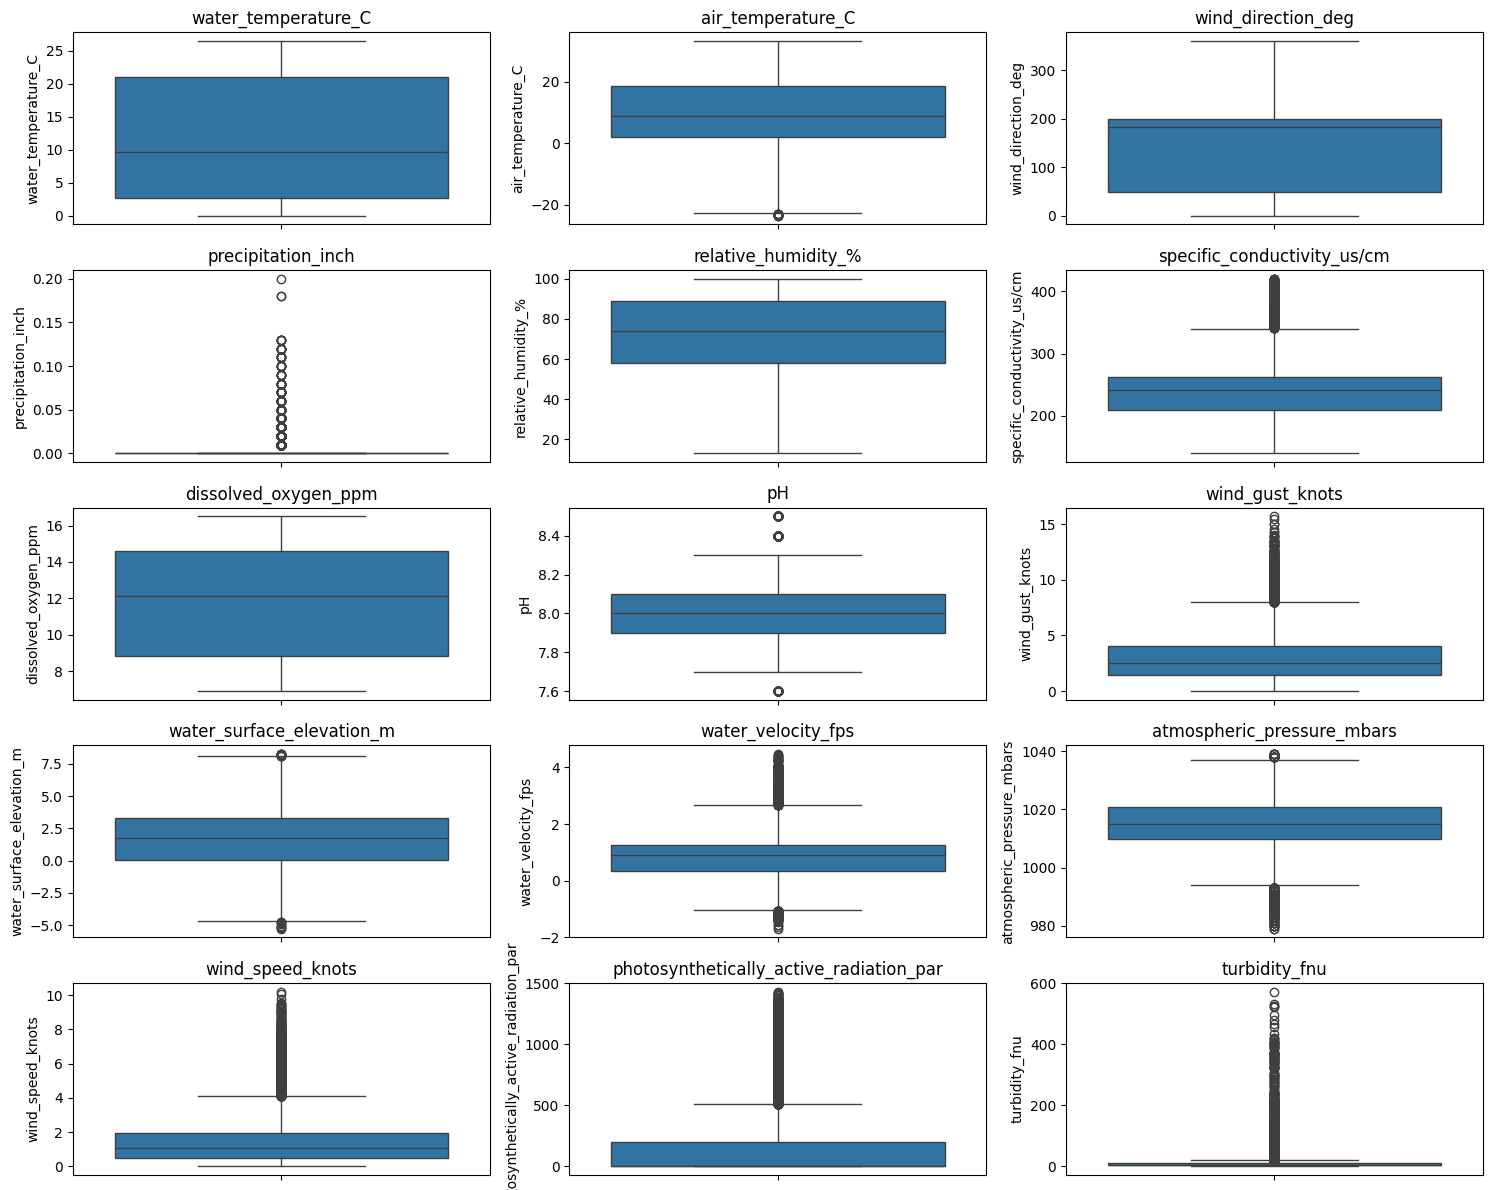

In [59]:
# visualizing summary of statistics of the data


## selecting numerical features to plot (for reproducibility)
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

## setting up the number of rows and columns for the subplot grid
n_features = len(numerical_features)
n_cols = 3 
n_rows = (n_features + n_cols - 1) // n_cols

## creating a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))

## flattening the axes array for easy iteration 
axes = axes.flatten()

## looping through each feature and plot a boxplot on its corresponding subplot
for i, feature in enumerate(numerical_features):
    sn.boxplot(data=df[feature], ax=axes[i])
    axes[i].set_title(f'{feature}')

## hiding any remaining empty subplots (if the grid size exceeds the number of features)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# adjusting the layout
plt.tight_layout()


Some quick observations for later:

- Precipitation: mostly zero, might make it difficult to model relationships with precipitation.
- Water surface elevation: negative values could indicate errors or tidal influence.
- Water velocity: negative values suggest either bad data or reverse flow (possibly due to tidal influence).
- Turbidity: outliers impact the mean (likely from runoff or point-source pollution), have to be handled before modeling.

In [60]:
# let's look at the missing values and completeness of our data set
completeness_table = pd.DataFrame({
    'Feature': df.columns,
    'Non-null Count': df.notnull().sum(),
    'Missing Count': df.isnull().sum(),
    'Missing Percentage': df.isnull().mean() * 100
}).set_index('Feature')
print(completeness_table)

                                         Non-null Count  Missing Count  \
Feature                                                                  
water_temperature_C                               39408            336   
air_temperature_C                                 39548            196   
wind_direction_deg                                39548            196   
precipitation_inch                                39548            196   
relative_humidity_%                               39551            193   
specific_conductivity_us/cm                       39401            343   
dissolved_oxygen_ppm                              39390            354   
pH                                                39313            431   
wind_gust_knots                                   39551            193   
water_surface_elevation_m                         39610            134   
water_velocity_fps                                39600            144   
atmospheric_pressure_mbars            

Text(0, 0.5, 'Percentage')

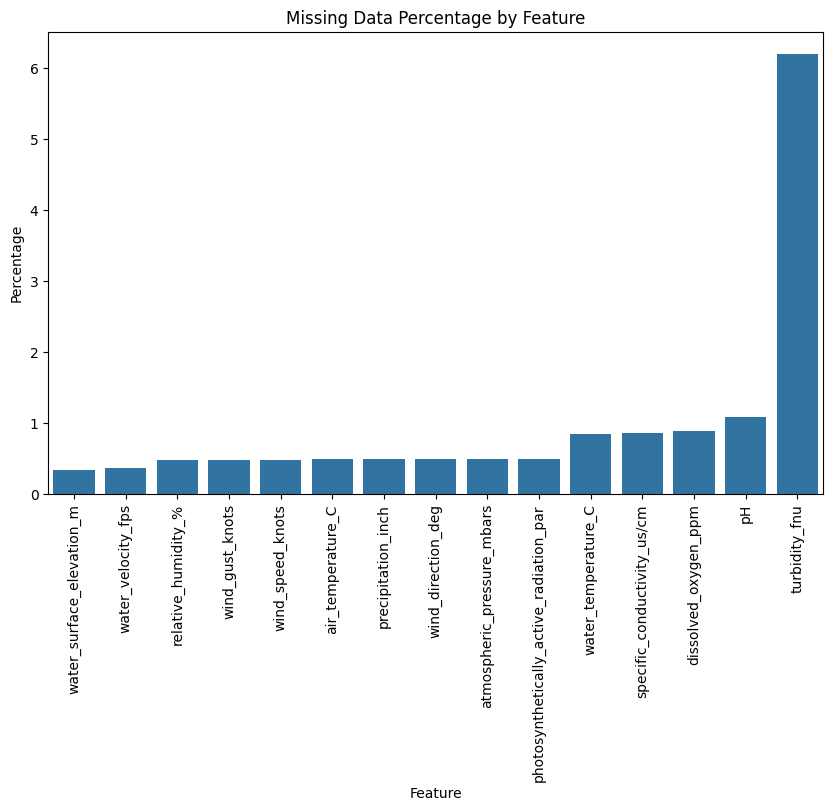

In [88]:
# visualizing completeness of the data

## let's sort the completeness_table in an ascending order to be easier to compare
completeness_table_sorted = completeness_table.sort_values(by="Missing Percentage", ascending=True) 


## now let's visualize our quick stats summary for each feature in an ascending order
plt.figure(figsize=(10,6))
sn.barplot(x=completeness_table_sorted.index, y="Missing Percentage", data=completeness_table_sorted)
plt.xticks(rotation=90)
plt.title("Missing Data Percentage by Feature")
plt.ylabel("Percentage")

Quick note:

- Almost all of our features include missing data except the time. 
- This must be taken care of before developing any model. 
- We may either impute them or delete them.

In [62]:
# Location

## let's have a quick look at the location to help during EDA

## here are the coordinates for the station (Port of Albany, New York on the Hudson River) 
## https://waterdata.usgs.gov/nwis/uv?legacy=1&site_no=01359165
station_lat = 42.6413
station_lon = -73.7489

## creating a map centered on the station
m = folium.Map(location=[station_lat, station_lon], zoom_start=12)

## Add a marker for the station
folium.Marker(
    [station_lat, station_lon], 
    popup='USGS Station: Port of Albany'
).add_to(m)

m


# Features with interesting characteristics

From the results above, there are some features that look troublesome and worth looking further into their details. These features are as follows:<br>

- Turbidity: high missing values, outliers.<br>
- Water surface elevation: negative values.<br>
- Water velocity: negative values.<br>
- Precipitation: mostly zero.<br>
- DO: important parameter for aquatic life.

Text(0, 0.5, 'Frequency')

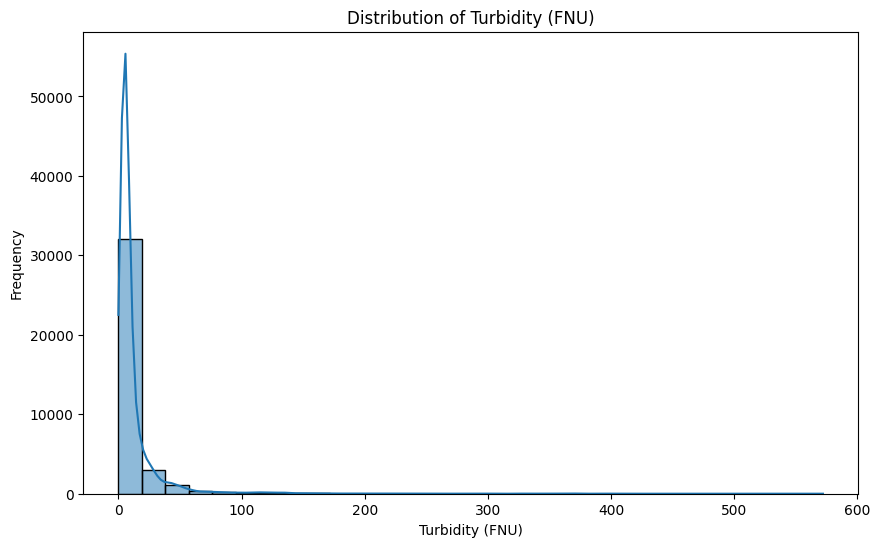

In [63]:
# Turbidity

## visualizing the distribution of turbidity to better understand its outliers and variability
plt.figure(figsize=(10, 6))
sn.histplot(df['turbidity_fnu'].dropna(), bins=30, kde=True)
plt.title('Distribution of Turbidity (FNU)')
plt.xlabel('Turbidity (FNU)')
plt.ylabel('Frequency')


Quick notes for turbidity

- long tail with several high outliers.
- outliers are likely due to environmental events (e.g. runoff or tidal influence) or point-source pollution (e.g., industrial activity).
- outliers may disproportionately affect model training. 
- careful outlier handling or robust scaling may be needed.
- further investigating those outliers (e.g., comparing with precipitation) may shed light on possible root cuases such as environmental events (e.g., runoff)

Number of negative water surface elevation values: 9339


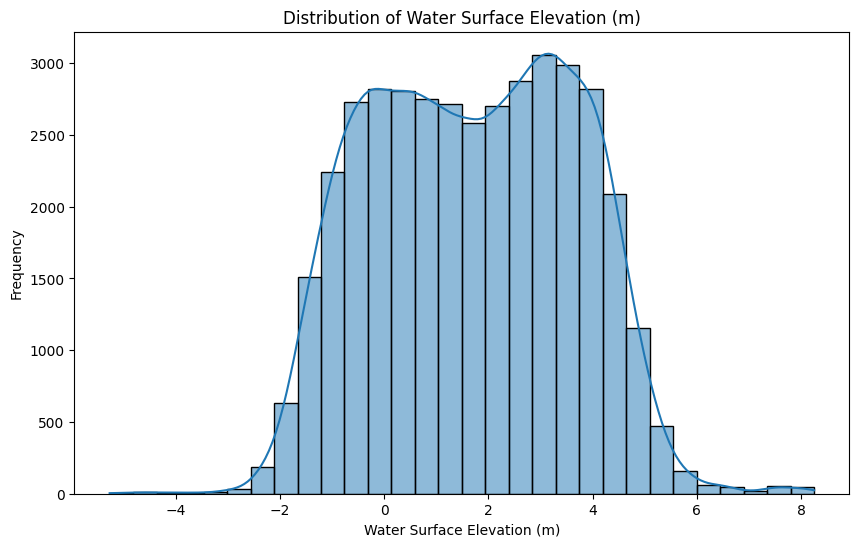

In [64]:
# Water surface elevation

## checking the distribution of water surface elevation to see if there are specific patterns
plt.figure(figsize=(10, 6))
sn.histplot(df['water_surface_elevation_m'].dropna(), bins=30, kde=True)
plt.title('Distribution of Water Surface Elevation (m)')
plt.xlabel('Water Surface Elevation (m)')
plt.ylabel('Frequency')

## Check for negative values
negative_wse = df[df['water_surface_elevation_m'] < 0]
print(f"Number of negative water surface elevation values: {len(negative_wse)}")


Quick notes on water surface elevation

- negative values could be due to error or related to specific environmental conditions (e.g., tidal action). 
- investigating local hydrological studies on Hudson River and correlation with time of the day could help us for considering this possibility.
- if tidal influences exist in this location, we may be needed to decide whether to remove or treat these values separately, especially if they skew results, before modeling.
- high elvation also may indicate flooding, correlation with precipitation, water velocity, and time of the year may help for this

Number of negative water velocity values: 5507


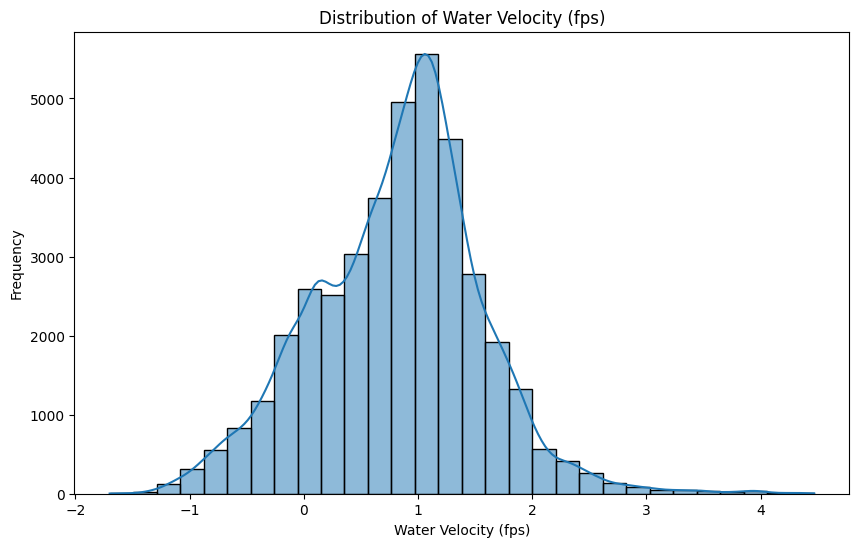

In [65]:
# Water velocity

## visualizing the distribution of water velocity 
## to examine the negative velocities that could indicate reverse flow and how common this phenomenon is
plt.figure(figsize=(10, 6))
sn.histplot(df['water_velocity_fps'].dropna(), bins=30, kde=True)
plt.title('Distribution of Water Velocity (fps)')
plt.xlabel('Water Velocity (fps)')
plt.ylabel('Frequency')

## checking for negative values in water velocity
negative_wvel = df[df['water_velocity_fps'] < 0]
print(f"Number of negative water velocity values: {len(negative_wvel)}")


Quik notes on water velocity

- presence of negative values may be due to error or tidal influence
- investigating these values with water surface elevation and time of the day may also help us understand if tidal influence happens here.
- like water surface elevation, if tidal influence exist, we need to consider removing or treating these negative values separately before modeling.

Number of zero precipitation values: 38220


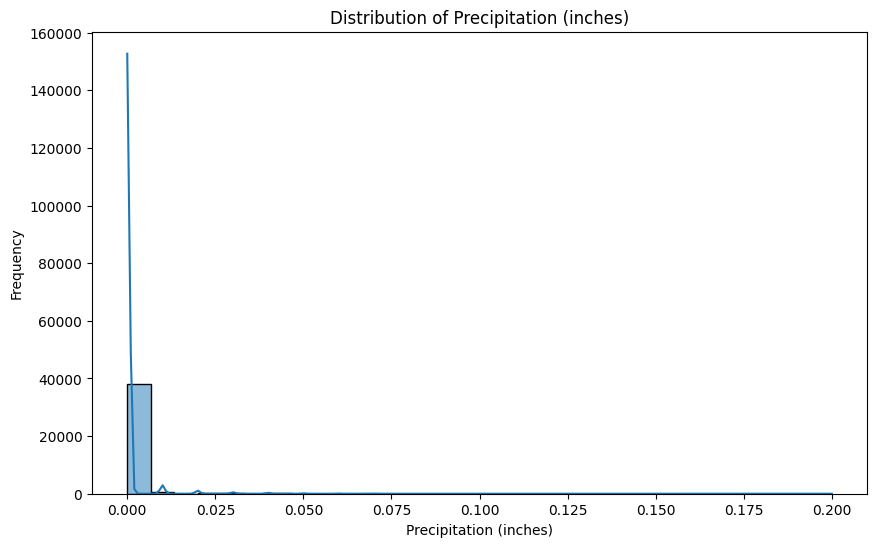

In [66]:
# Precipitation

## visualizing the distribution of precipitation to confirm the rarity of rainfall events
plt.figure(figsize=(10, 6))
sn.histplot(df['precipitation_inch'].dropna(), bins=30, kde=True)
plt.title('Distribution of Precipitation (inches)')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')

## check for zero values
zero_precipitation = df[df['precipitation_inch'] == 0]
print(f"Number of zero precipitation values: {len(zero_precipitation)}")


Quick notes on precipitation

- precipitation event are rare.
- since we don't have significant precipitation events in this period, this may be a sign that tidal influence does exist in the location (considering the results of prvious sections).
- using precipitation in modeling needs special treatent (e.g., transforming to binary rain/no-rain feature) due to large number of zeros.

Text(0, 0.5, 'Frequency')

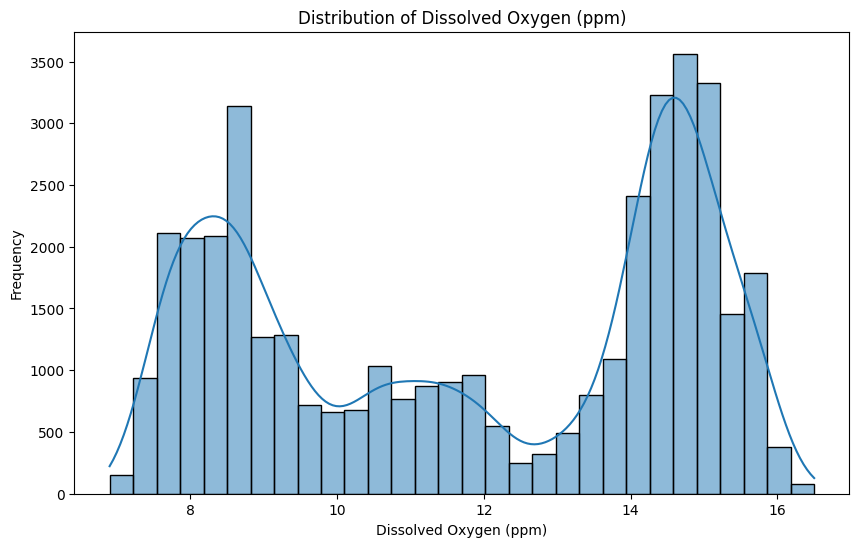

In [67]:
# DO

## visualizing the distribution of dissolved oxygen
plt.figure(figsize=(10, 6))
sn.histplot(df['dissolved_oxygen_ppm'].dropna(), bins=30, kde=True)
plt.title('Distribution of Dissolved Oxygen (ppm)')
plt.xlabel('Dissolved Oxygen (ppm)')
plt.ylabel('Frequency')

Quick notes on DO

- distribution is bi-modal with two distinct peaks around 8ppm and 15ppm.
- the bi-modality could be due to weather temperature and/or tidal influence.
- correlation analysis with tempurature, water surface elevation, water velocity may shed more light.

Text(0.5, 1.0, 'Correlation Matrix of All Features')

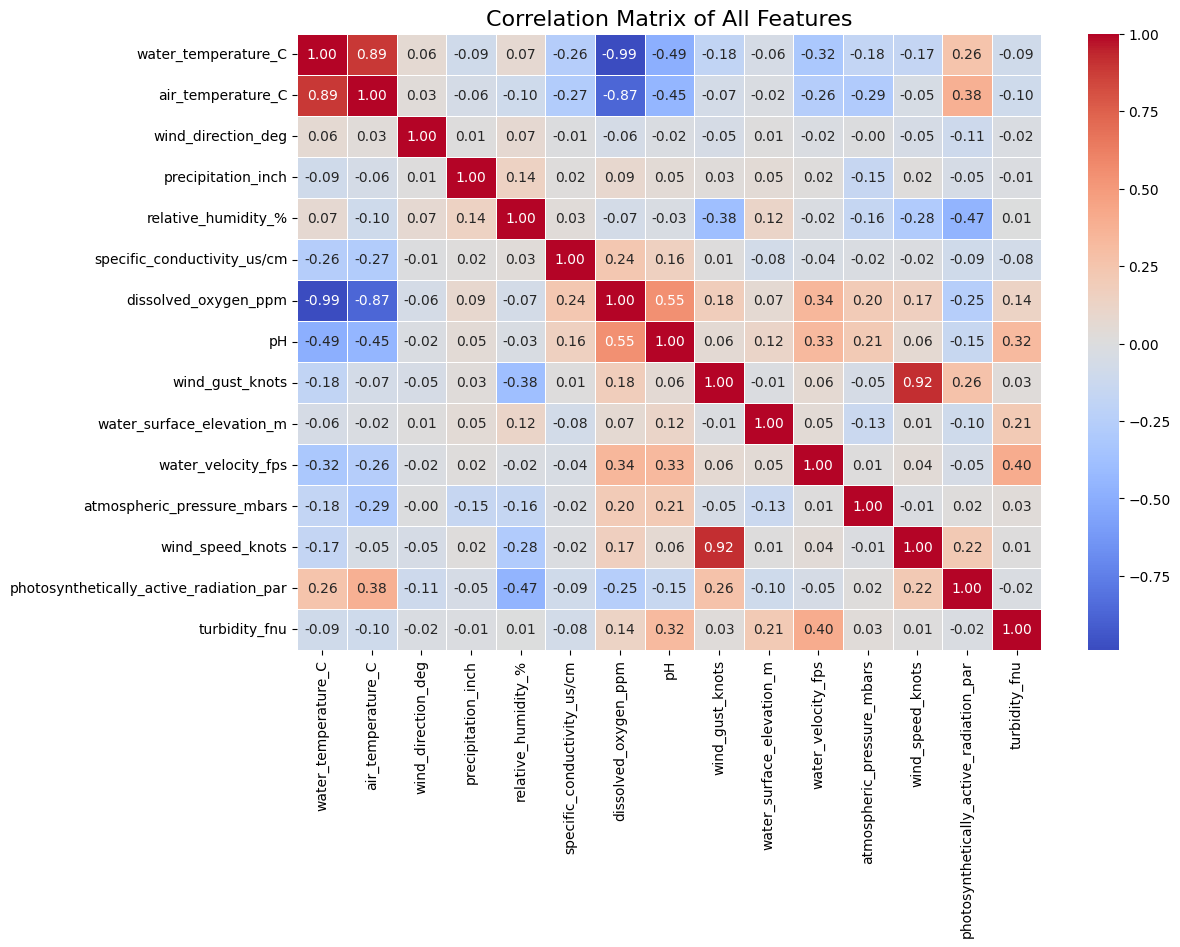

In [89]:
# correlation analysis (linear)

## calculating the correlation matrix
correlation_matrix = df.corr()

## setting up the matplotlib figure
plt.figure(figsize=(12, 8))

## drawing the heatmap
sn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

## title
plt.title('Correlation Matrix of All Features', size=16)


Quick notes on correlation analysis

- for simplicity, here we use Pearson correlation despite the fact that we know the relationships between features may not be linear and we have outliers in some of our features.
- for further correlation investigation, methods like rolling correlation with proper window for each pair of feature may help.
- turbidity is more correlated with water velocity, water surface elevation, and pH. This can be interpreted that those outliers may not be due to flooding, however, tidal influence and non-point source pollutions (e.g., industrial activity) may be the contributing factors.
- water surface elevation corralations (with precipitation and velocity) do not show significant values. This may help us reject the flooding in the area. The fact that we don't have that much precipitation also help with this rejection.
- water velocity correlation with water surface elevation do not have significant correlation. This need more analysis to look into more details to understand if those negative water velocity values are due to tidal influence or errors.
- Do is highly correlated with several features. In a descending order, temperature, pH, water velocity, radiation, and conductivity are the top 5. Water surface elevation and DO has a positive correlation but it's not significant comparing to the other ones. This may indicate that those two high peaks in DO are not solely due to tidal influence and water quality also is a significant factor. We should also consider that correlation does not mean causation and the fact that tidal influence can alter water quality.
- It may be hard to exactly find root causes of fluctuations in DO, but this exercise give us good insight for selecting features for modeling DO using this data set.

## Exploring the causal relationship between tidal influence and DO

There are a number of possible causal relationships between the features of this data set as follows. The one that got me interested based on EDA conducted above is the one between tidal influence (using water surface elevation as a proxy) and DO level.

- water temperature --> DO
- water surface elevation --> DO
- precipitation --> water surface elevation
- precipitation --> turbidity
- water velocity --> DO
- wind speed --> DO
- air temperature --> water temperature
- par --> DO
- relative humidity --> precipitation
- wind speed --> water surface elevation
- precipitation --> pH
- water velocity --> turbidity 
- water temperature --> specific conductivity 
- armospheric pressure --> DO
- wind speed --> wind gusts

1) Hypothesis:

Changes in water surface elevation (used as a proxy for tidal influence) may affect DO levels due to water mixing, inflows of low or high oxygen water, or stratification.

2) Causal graph:

water surface elevation (tidal proxy) --> DO

As tides rise and fall, they can influence DO directly by:

- Bringing in oxygen-poor water during low tide, which decreases DO.
- Bringing in oxygen-rich water during high tide, which increases DO.
- Mixing the water column during tidal fluctuations, impacting oxygen distribution.

3. Causal analysis

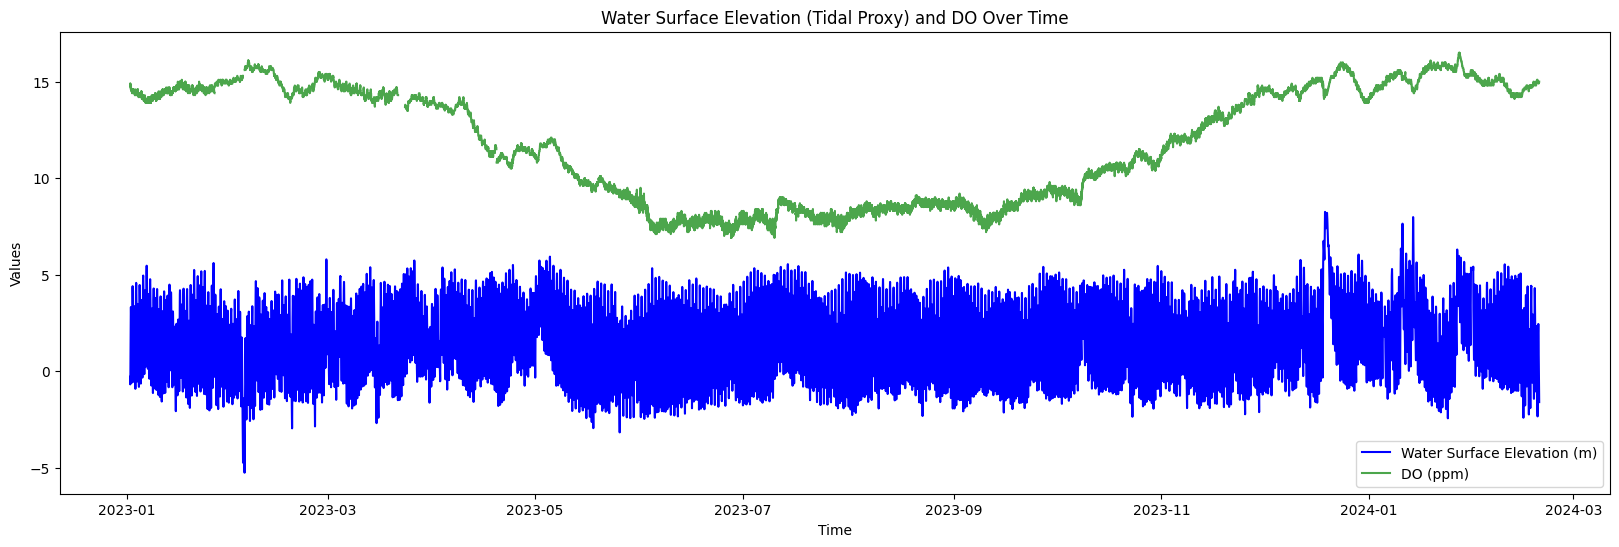

In [79]:
# 3.1. exploratory analysis

## plotting water surface elevation and DO to check for patterns
plt.figure(figsize=(20, 6))
plt.plot(df['water_surface_elevation_m'], label='Water Surface Elevation (m)', color='b')
plt.plot(df['dissolved_oxygen_ppm'], label='DO (ppm)', color='g', alpha=0.7)
plt.title('Water Surface Elevation (Tidal Proxy) and DO Over Time')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()


In [82]:
df.columns


Index(['water_temperature_C', 'air_temperature_C', 'wind_direction_deg',
       'precipitation_inch', 'relative_humidity_%',
       'specific_conductivity_us/cm', 'dissolved_oxygen_ppm', 'pH',
       'wind_gust_knots', 'water_surface_elevation_m', 'water_velocity_fps',
       'atmospheric_pressure_mbars', 'wind_speed_knots',
       'photosynthetically_active_radiation_par', 'turbidity_fnu'],
      dtype='object')

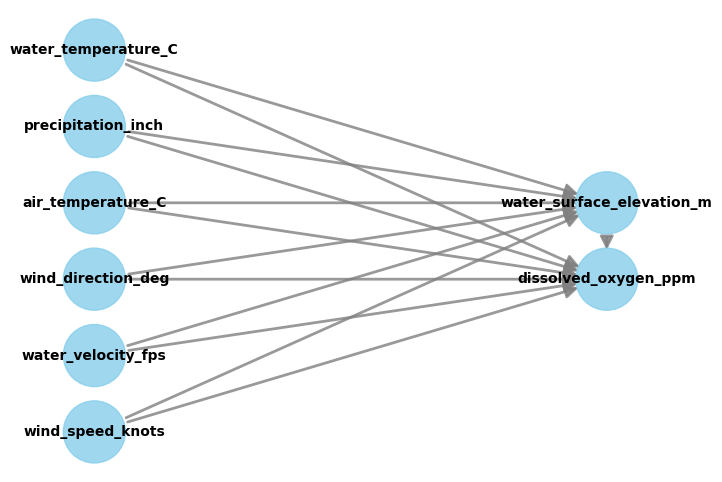

In [84]:
# 3.2. Causal relationship


from dowhy import CausalModel

## defining  relevant features
df_subset = df[['water_surface_elevation_m', 'dissolved_oxygen_ppm','water_temperature_C', 
                'wind_speed_knots', 'wind_direction_deg', 'precipitation_inch',
                'air_temperature_C', 'water_velocity_fps']].dropna()

## creating the causal model
model = CausalModel(
    data=df_subset,
    treatment='water_surface_elevation_m',
    outcome='dissolved_oxygen_ppm',                     
    common_causes=['water_temperature_C', 'wind_speed_knots', 
                   'wind_direction_deg', 'precipitation_inch',
                'air_temperature_C', 'water_velocity_fps']  
)

## visualizing the causal graph
model.view_model()


In [85]:
## identifying the causal effect
identified_estimand = model.identify_effect()

print(identified_estimand)


Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
             d                                                                 ↪
────────────────────────────(E[dissolved_oxygen_ppm|wind_speed_knots,water_vel ↪
d[water_surface_elevation_m]                                                   ↪

↪                                                                              ↪
↪ ocity_fps,wind_direction_deg,air_temperature_C,precipitation_inch,water_temp ↪
↪                                                                              ↪

↪            
↪ erature_C])
↪            
Estimand assumption 1, Unconfoundedness: If U→{water_surface_elevation_m} and U→dissolved_oxygen_ppm then P(dissolved_oxygen_ppm|water_surface_elevation_m,wind_speed_knots,water_velocity_fps,wind_direction_deg,air_temperature_C,precipitation_inch,water_temperature_C,U) = P(dissolved_oxygen_ppm|water_surface_elevation_m,wind_speed_knots,water_velocity_fps,wind

Quick notes on method:

- non-parameteric: no assumption on mathematical realationship (e.g., linear and quadratic)
- ATE (Average Treatment Effect): measures the average impact of one variable on another across the entire dataset

In [86]:
## estimating the causal effect using linear regression (for simplification)
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression")

print(estimate)


*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
             d                                                                 ↪
────────────────────────────(E[dissolved_oxygen_ppm|wind_speed_knots,water_vel ↪
d[water_surface_elevation_m]                                                   ↪

↪                                                                              ↪
↪ ocity_fps,wind_direction_deg,air_temperature_C,precipitation_inch,water_temp ↪
↪                                                                              ↪

↪            
↪ erature_C])
↪            
Estimand assumption 1, Unconfoundedness: If U→{water_surface_elevation_m} and U→dissolved_oxygen_ppm then P(dissolved_oxygen_ppm|water_surface_elevation_m,wind_speed_knots,water_velocity_fps,wind_direction_deg,air_temperature_C,precipitation_inch,water_temperature_C,U) = P(dissolved_oxygen_ppm|water_surface_elev

c:\Users\30054973\ds-interviews_BC\water-data-env\Lib\site-packages\dowhy\causal_estimators\regression_estimator.py:179: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


Quick note on the causal effect value:

- 0.014 indicates a positive causal relationship, however, it's very low.
- this finding supports the EDA finding.